# Constant Product AMM

## What is constant product AMM?

Working with a curve instead of a straight line that modifies the slope depending on the trading activity could be more beneficial. Your want it to act in a way where prices increase as the demand for respective assets increase and they are scarce - similarly to the manual work you are doing in the weighted constant sum AMM.

This could be a representation of a constant product AMM curve: x*y=k

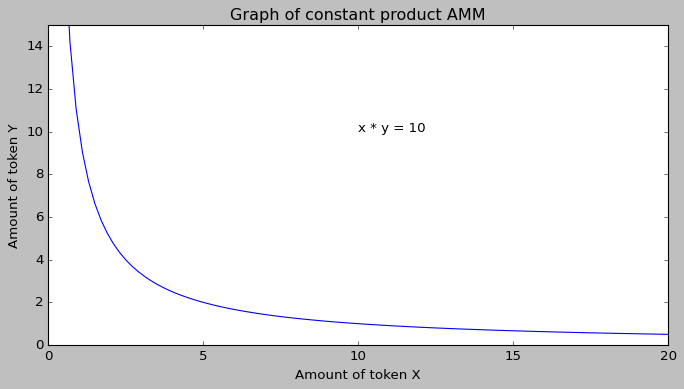

In [1]:
# some needed libraries for later use
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')

plt.figure(figsize=(10,5))

plt.title("Graph of constant product AMM")

plt.xlabel("Amount of token X")
plt.ylabel("Amount of token Y")

x = np.linspace(0.1, 20, 100)
k = 10
y = k / x

plt.axis([0,20, 0, 15])
plt.text(10, 10, "x * y = 10")

plt.plot(x, y)

From the variables tracked in the state space variables, we can calculate all other information we would want. Let's begin with the stateful metrics.

![title](img/metrics_table_product_amm.png)
-----------------------------------

When an agent makes a trade with the pool, swapping one token for another, it does not impact the number of pool shares in the pool or in the agent's wallet. A trade will only affect the number of each token that the pool and the agent each possess.

The key to understanding the mathematics of a token swap is to rely on the constant product formula x•y = k. In a market without fees, this must always hold. Below, we will go step-by-step through some common situations where a trader might wish to have a formula, and we will derive the formulas they would need. 

If we know:
- x, the amount of Token X in the pool
- y, the amount of Token Y in the pool
- Δx, the amount that Token X will change (the tokens we are to put into the pool)

We can calculate Δy, the amount that Token Y will change. 

We begin by setting the new product and previous product equal to each other, since they should each be equal to the invariant.
```
x_new * y_new = k = x_old * y_old
```
Then, we distribute algebraically and subtract the xy term from both sides. 
```
(x + Δx)(y + Δy) = xy
xy + xΔy + yΔx + ΔyΔx = xy
```
Our goal is to solve for Δy, so we isolate all of the Δy terms to one side. Then we factor out Δy.
```
xΔy + yΔx + ΔyΔx = 0
xΔy + ΔyΔx = -yΔx
Δy(x + Δx) = -yΔx
```
 Finally, we divide to isolate Δy as its own variable. This is the amount of the token Y that will change.
## How many tokens Y
```
Δy = -yΔx/(x + Δx)
```
-----------------------------------
We can calculate also Δx, the amount that Token X will change. 

We begin by setting the new product and previous product equal to each other, since they should each be equal to the invariant.
```
x_new * y_new = k = x_old * y_old
```
Then, we distribute algebraically and subtract the xy term from both sides. 
```
(x + Δx)(y + Δy) = xy
xy + xΔy + yΔx + ΔyΔx = xy
```
Our goal is to solve for Δx, so we isolate all of the Δx terms to one side. Then we factor out Δx.
```
xΔy + yΔx + ΔyΔx = 0
yΔx + ΔyΔx = -xΔy
Δx(y + Δy) = -xΔy
```
Finally, we divide to isolate Δx as its own variable. This is the amount of the token X that will change.
## How many tokens X
```
Δx = -xΔy/(y + Δy)
```

## Liquidity

A liquidity pool needs to be filled with some tokens to allow trading; you can not trade with someone who has nothing to trade.  The process of adding tokens to a pool is referred to as adding liquidity, while the opposite process of removing tokens is referred to as removing liquidity. 

In Uniswap, these processes are not allowed to change the prices px and py, but only increase or decrease the value of the invariant k. We also do not want adding or removing liquidity to have any influence on the value of the already given supply: those who provided liquidity should not lose or gain any value when someone else buys or sells shares.

Also, when an agent provides liquidity (Token X and Token Y) to the pool, new *pool shares* or *pool tokens* are minted, which the agent now owns. We need to know how those pool tokens will be issued based on the liquidity provided. This will typically be determined by either the amount of Token X or the amount of Token Y (since they will be deposited together). 


### Changes in liquidity will not change the price
We assume that the change of Token X in the pool, that is Δx, is given and need to determine Δy so that neither px nor py are changed:
```
p_x = y/x = y_new/x_new = (y + Δy)/(x + Δx)
```
We multiply both side of the equation for px by x + Δx to obtain the new equation on the left. 
```
p_x(x + Δx) = y + Δy
y/x(x + Δx) = y + Δy

Δxy/x + y = y + Δy
Δxy/x = Δy
```

If we know Δx, the amount of Token X being added, we need to set Δy (the amount of Token Y being added) so that Δy = px Δx. This will make sure that the prices in the pool do not change, which is what we want. 
```
Δxp_x = Δy
Δy = p_xΔx
```


### Changes in liquidity will change the invariant (k)**
To get the new invariant knew , we notice that it must satisfy: 
```
x_new * y_new = k_new

x_new = x + Δx
y_new = y + Δy

(x + Δx)(y + Δy) = k_new
```
Applying basic distribution, this becomes
```
xy + xΔy + yΔx + ΔxΔy = k_new
```
Now we know that the original invariant was the product of the original amounts (xy = k), so solving this: 
```
k + xΔy + yΔx + ΔxΔy = k_new
xΔy + yΔx + ΔxΔy = k_new - k
```
**New liquidity of the pool:**
```
Δk = xΔy + yΔx + ΔxΔy 
```




-----------------------------------
Additional info: [This page](https://ethereum.org/ca/developers/tutorials/uniswap-v2-annotated-code/) is a very good walkthrough of Uniswap V2 contracts functionality

## Minting and Burning Pool Tokens

When an agent provides liquidity to a pool, that agent should receive a number of pool tokens representing their ownership of a portion of the pool. 

What are the precise formulas for how this will change the system?

In Uniswap version 2, not all pools contained ETH, so a different approach must be used. 

The amount of new pool shares created for the agent who creates the pool and deposits x0 Token X and y0 Token Y is given by the square root of the product x0 • y0 .

```
initial_pool_shares = sqrt(initial_token_x * initial_token_y)
```
or
```
Sp = sqrt(x_0 * y_0)
```
### Ratio of pool shares created (formula for deposits once pool exists)

If an agent is adding liquidity to a pool that already exists, then the ratio of pool shares created to existing pool shares will be equal to the ratio of new Token X being deposited to existing Token X in the pool. 

```
shares_created / shares_currently_in_pool = token_x_added / token_x_currently_in_pool
```
or
```
ΔSp/Sp = Δx/x
```
### Minting pool shares for liquidity insertion (assuming equal value deposits of Token X and Token Y)

Using the previous formula, we can calculate how many new pool shares there will be based on the current amount of Token X and the number of Token X being inserted (or equivalently, the amount of Token Y in the pool, plus the amount of Token Y being inserted). 

**To calculate new Pool Shares:**
```
new_Sp = Sp + Δx/x 
```
or
```
new_Sp = Sp + Δy/y 
```
**To calculate new Agent Shares:**
```
new_Ap = Ap + Δx/x 
```
or
```
new_Ap = Ap + Δy/y 
```
### Removal of liquidity - Pool Shares

When an agent decides to remove their shares of the pool, the calculation is fairly straightforward. The number of pool shares for both the agent and the system changes by the number of shares being withdrawn. 

The number of Token X and Token Y leaving the pool and going to the agent will change proportionally, by the amount of shares being removed divided by the total number of shares. 


# Slippage and Impermanent loss (without fees)

In the previous section, we discussed the connection between price of an asset and slope of a line or curve. An Automated Market Maker actually has two kinds of price: **spot price** and **effective price**. 

We discussed price associated to a trade as a ratio between the amounts exchanged between the two quantities. This type of price is called effective price, since it is the price actually paid by the trader. 

Another type of price is called spot price. The spot price is a theoretical price, based on looking at smaller and smaller amounts of the token being traded in. It can be visualized as the opposite of the slope of the tangent line to the curve at that point. Spot price is typically what is quoted by an AMM to a trader before a trade is made. 

The difference between effective price and spot price is called **slippage**. Slippage is undesirable for traders. 

```
k = xy

d[k]/dx = d[xy]/dx 

0 = y + xdy/dx 
```
**Spot price formula**:
```
-y/x = dy/dx
```

**The effective price may differ considerably from the spot price because of the liquidity in the pool size is relative small or the swap size is relatively large.** 

**The slippage also corresponds to the difference in slopes of the tangent line and the secant line**

**The traders are going to care about the slippage**

**Increasing liquidity in the pool decreases the slippage**

It is possible to visualize the slippage roughly from the curve by comparing the slope of the secant line to the slope of the tangent line.

It is also good idea to think about the formulas, Slippage with no fees:

```
slippage_no_fees = (y_new - y_old)/(x_new - x_old) - y_old/x_old
```

Now let's develop an alternative formula for slippage amount (the total value the trader loses in slippage) based on things the trader knows when they make the trade. 

## SlippageAmount (total value the trader loses)

Assuming that the AMM announces a price px for a swap from Token X to Token Y, one would expect that a swap of Δx results in an amount of px Δx of Token y. 

In previous sections, we used xin to represent the amount of the Token X, so we can write this as px · xin. But remember that the "announced" price will be the spot price, which is just y/x.

Slippage on the return can be measured as the difference between this expected return and the real return Δy, which we also called yout previously.

So we can express this slippage amount as y/x · xin - yout . We actually developed a formula for yout in terms of xin, x, and y in a previous section. 

If we use substitute that formula here, we can develop a formula for the slippage on a trade given x, y, and xin.

```
slippage_amount = actual_y_out - expected_y_out

slippage_amount = (x_in*y)/(x+x_in) - Px*x_in

slippage_amount = (x_in*y)/(x+x_in) - (y/x)*x_in

slippage_amount = x_in*(y/(x+x_in) - y/x)
```
----------------------------------------------------------------
## Impermanent Loss or Divergent Loss

The Liquidity Provider may be surprised that the value of their holdings can go down in response to changes in price on an external market. 

Impermanent Loss is related to price alignment: Our market lives inside a wider market with possibly different prices and the relationship between these different prices will influence the value of different pools.

**Example:** Imagine we have a Liquity pool with two tokens X and Y with no trading fees. 

- Token X is worth 1000 USDC
- Token Y is worth 3000 USDC
- A liquidity provider puts in the pull 6 token X (6.000 USDC) and 2 token y (6.000 USDC). The total liquidity in the pool is 12.000 USDC. 
- Suddenly, the token Y price increases in the external market and now is worth 12.000 USD instead of 3.000 USDC.
- An arbitrageur comes in and trades 6 token X per 1 token Y. The pool is in equilibrium, because both parts are 12.000 USDC (but the trader has a profit of 6.000 USDC)
- The liquidity provider decides to redeem all the pool shares, closing the pool and reclaiming the tokens. The problem is that if he held the tokens, now he would have 30.000 USD (6 X + 2 Y), now the pool has 12 X + 1 Y) = 24.000 USDC.
- The liquidity provider has incurred a loss of 6.000 USDC, this loss is called **Impermanent loss** or **divergence loss**. This is the difference between holding the tokens or putting them into the pool. The loss of the LP is the profit of the arbitrageur trader. 


### How to Calculate Value? 

Remember that price reflects a relationship between two assets. 1 ETH is always worth 1 ETH, just as 1 US Dollar is always worth 1 US Dollar, 1 Euro is always worth 1 Euro, and 1 gallon of water is always worth 1 gallon of water. If we have a pool of Token X and Token Y, how do we express the value of that pool as the quantities of each asset change? 

It is common to speak of a numeraire, an underlying asset through which the value of other assets is measured (often fiat currency issued by a nation-state, such as US Dollars or Euros). If we agree on a numeraire for tracking value, we would simply do the simple calculation

```
Value = (Numeraire Price Token X) (Amount Token X) + (Numeraire Price Token Y) (Amount Token Y)
```
It simplifies our life a bit if we just assume that Token Y is the numeraire currency, in which case the Numeraire Price of Token Y is always equal to 1. This lets us simplify the formula for value of a pool. 

```
Value = (Price Token X) (Amount Token X) + (Amount Token Y)
```
This gives value as expressed in Token Y. If Token Y is not our desired numeraire, we can simply take the above calculation and multiply it by the price of Token Y in terms of the numeraire. 

We will write V for value and px  for the price of Token X (in terms of Token Y), giving us the very useful formula. 

```
V = px · x + y
```
The scenario for Impermanent Loss tracks over time how much the Value has changed. We need to know the following quantities:

- x: the original amount of Token X in the Pool
- y: the original amount of Token Y in the pool
- Δx: how much Token X has changed
- Δy: how much Token Y has changed
- px : the original price of Token X (in terms of Token Y)
- Δpx : how much the price of Token X has changed

```
impermanent_loss = change_in_value_of_pool / original_value_of_pool

impermanent_loss = ΔV/V

impermanent_loss = (V_new-V)/V

impermanent_loss = (new_price*new_x + new_y - old_price*old_x + old_y)/(p_x*x + y)

impermanent_loss = ((p_x + Δp_x)(x + Δx) + y + Δy - (p_x*x + y))/(p_x*x + y)

impermanent_loss = (xΔp_x + p_xΔx + ΔxΔy + Δy)/(p_x*x + y)
```

### The Importance of Fees

This explains why, in the real world, a constant product market maker liquidity pools might charge trading fees. A percentage of each trade will be deposited into the pool, increasing the amount of each type of token. Eventually the value of these accumulated fees may be large enough to offset the divergent loss.

The traders don't really like fees, since it costs the money. However, the fees attract liquidity providers, who reduce slippage, and this makes the traders happy. The question is - what is the right trade-off? How can we set up the fee so that it provides enough liquidity that the slippage is reduced to the trader's satisfaction, without making the fee so high that the trader refuses to pay it?

Finding the right value for the fee is an optimization problem, which will explore in later sections.


![title](img/fees_importance.png)



# Introducing Fees

Typically, an Automated Market Maker will charge fees that serve as rewards for Liquidity Providers. 
These fees will change some of the formulas that we have previously calculated. 

**With fees, the "invariant"  can vary 🤔**

Once we introduce fees into an Automated Market Maker, it changes the dynamics in an important way: the constant product formula xy = k no longer holds. Instead, as x and y change due to incoming trades, we will need to calculate a new constant k each time.

Before we talk about this in symbolic formula terms, let's calculate an example of a trade. 

Suppose that a Pool is initially created with 200 Token X and 2 Token Y. (x = 200, y = 2) 

Let's use the variable F for fees, and set a 5% fee on each trade (F = 0.05). 

The initial invariant is 200 ·  2 = 400. 

Now a Trader comes along, and wants to trade 100 Token X with the pool (Δx = 100). 

![title](img/fees_example.png)

The calculation using the invariant will now be based on an amount of incoming Token X discounted by the 5% fee. This is used to calculate the new amount of Token Y that should be in the pool; you can see the calculations in the image to the left.

When we calculate the new amounts of Token X and Token Y in the pool, we find that the constant product xy = 400 no longer holds! The product xy has increased to approximately 406.77966101694915254237288135 (the exact decimal representation will depend on the precision of the computational tool being used) 

**Calculating the new y_amount** (based on deposit of 100 Token X and 5% pool fees)
```
x_new = 200 + 100 = 300

(x_new - FΔx)*y_new = 400

(300 - 0.05*100)*y_new = 400

y_new = 400/295 = 1,355932203389831
```
**Calculating the new Invariant** (based on deposit of 100 Token X and 5% pool fees)
```
x_new * y_new = k_new

300 - 400/295 = k_new

k_new = 298,644067796610169
```

**The invariant changes as we make new calculations based on the amount into the pool. **

What the trader really cares about is how much of Token Y they will receive for their trade. 

They will receive the change that is necessary to make the new amount of Token Y in the Pool be 400/295, so they receive 2 - 400/295 or approximately 0.644067796 Token Y. 

For Comparison's Sake, in a pool with no fees, they would have received exactly 2/3 (approximately 0.666666 coins). They've lost about 0.02 Token Y by trading with a Pool that has a 5% fee. 

![title](img/fees_example2.png)

## Liquidity removal with fees

If the pool collects fees from traders, those fees accumulate to the pool. When a Liquidity Provider removes liquidity and burns their pool tokens, they will receive a portion of the fees that accumulated during the time they held those tokens. 

Let's take a deeper look at how this works. 

**A Liquidity Provider Receives Pool Shares**

When a Liquidity Provider provides Token X and Token Y to the pool, they receive pool shares corresponding to their ownership of the pool.

For example, suppose the Pool currently has 100 Token X, 200 Token Y, and 500 Pool Shares. The LP provides 50 Token X and 100 Token Y to the Pool. They will receive 250 Pool Shares, since the ratio of (Tokens Provided)/(Current Tokens) should match (Pool Shares Issued)/(Current Pool Shares). There are now 750 Pool Shares. 

Until someone else adds Liquidity to the Pool, the Liquidity Provider should be entitled to 1/3 of the fees collected. 

**Withdrawing Liquidity**

Let's say that at some later time, no new pool shares are issued, but the pool accumulates fees so that the amount of each token increases. Suppose the Pool accumulates  150 Token X and 300 Token Y in Pool Fees. 

The Pool now has 300 Token X and 600 Token Y. 

When the Liquidity Provider withdraws their 250 Pool Shares, they will be withdrawing 250/750 = 1/3 of the Pool Shares. Hence they will receive 100 Token X and 200 Token Y. 

This 100 Token X can be broken down as: the 50 Token X that the LP initially provided, plus 1/3 of the 150 Token X accumulated in fees. The 200 Token Y they receive breaks down similarly. 

**Pool Shares Track Proportional Allocation**

We encourage you to repeat these calculations with different values.